In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Desktop/Data Minning/Tweets.csv')
df.head()

,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!
4,1,"is LMAO, just thinkin of the 80/20 rule.....wo..."


In [2]:
df.shape

(40000, 2)

In [3]:
df.dropna(inplace=True)

In [4]:
# Extracting a sample
df = df.sample(n=20000, random_state = 48)
df.reset_index(drop=True, inplace=True)

In [5]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
%matplotlib inline
%matplotlib notebook

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS

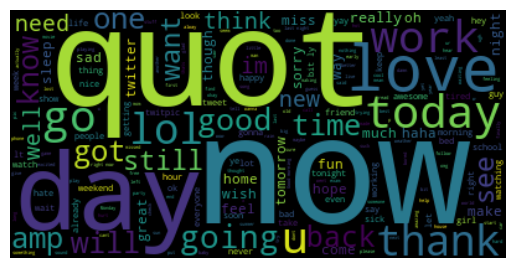

In [8]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["dep", "fuuck"])
tweet = " ".join(tweet for tweet in df.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(tweet)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

In [9]:
X = df['tweet']  # the features we want to analyze
y = df['sentiment']  # the labels

In [10]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [13]:
#training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GaussianNB()

In [14]:
#prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [15]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'NB')

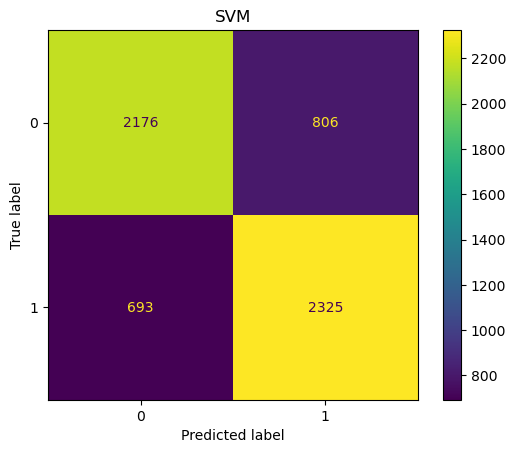

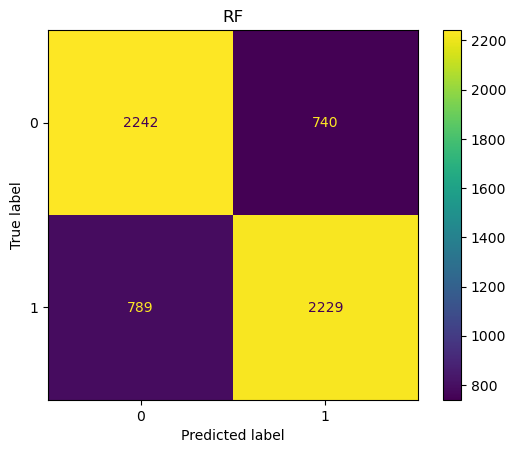

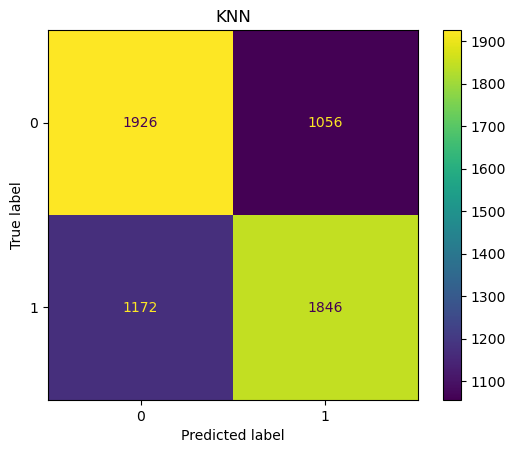

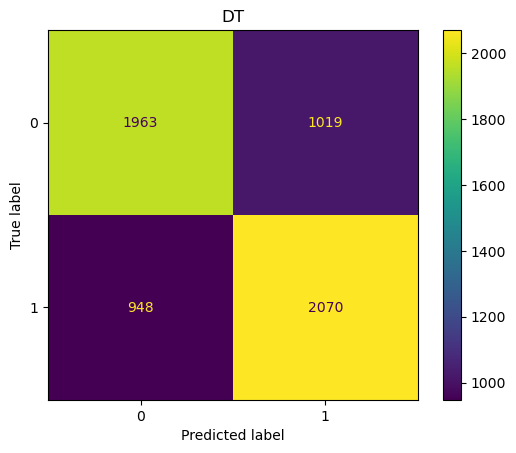

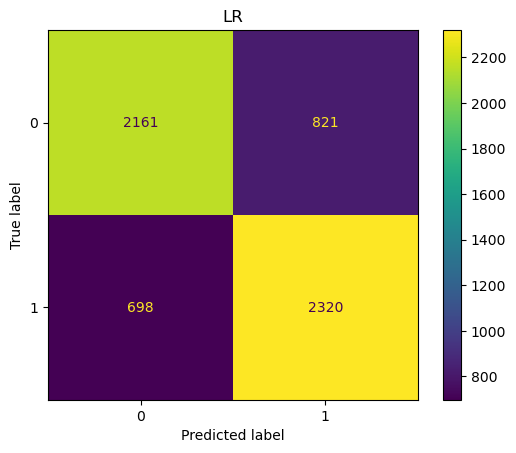

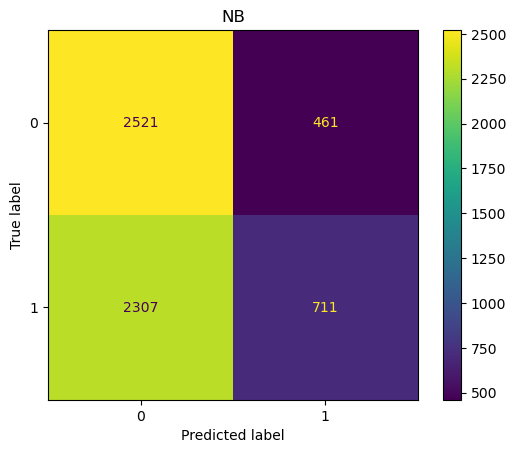

In [16]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=DT.classes_)
disp.plot()
plt.title("LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=DT.classes_)
disp.plot()
plt.title("NB")

In [17]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 2325
True Negatives: 2176
False Positives: 806
False Negatives: 693
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: 0.77
Specificity: 0.73
Precision: 0.73
f_1 Score: 0.75



RF metrics

True Positives: 2229
True Negatives: 2242
False Positives: 740
False Negatives: 789
--------------------------------------------------
Accuracy: 0.75
Mis-Classification: 0.25
Sensitivity: 0.74
Specificity: 0.75
Precision: 0.75
f_1 Score: 0.75



KNN metrics

True Positives: 1846
True Negatives: 1926
False Positives: 1056
False Negatives: 1172
--------------------------------------------------
Accuracy: 0.63
Mis-Classification: 0.37
Sensitivity: 0.61
Specificity: 0.65
Precision: 0.65
f_1 Score: 0.63



DT metrics

True Positives: 2070
True Negatives: 1963
False Positives: 1019
False Negatives: 948
--------------------------------------------------
Accuracy: 0.67
Mis-Classification: 0.33
Sensitivity: 0.69
Specificity: 0.6